# # Loan Paying Classification - ANN model !
The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), 
#can we build a model thatcan predict wether or nor a borrower will pay back their loan? 
#This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back 
#the loan. Keep in mind classification metrics when evaluating the performance of your model!
#The loan_status column contains our label

In [289]:
#feature information on the data as a .csv file for easy lookup throughout the notebook
import pandas as pd
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [140]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])
    
feat_info('mort_acc')

Number of mortgage accounts.


In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [142]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

<AxesSubplot:xlabel='loan_status', ylabel='count'>

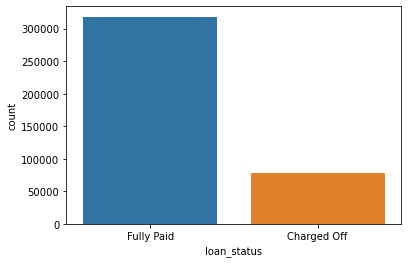

In [144]:
#perform EDA 
#attempting to predict loan_status
sns.countplot(x='loan_status',data=df)

C:\Users\sujay\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 45000.0)

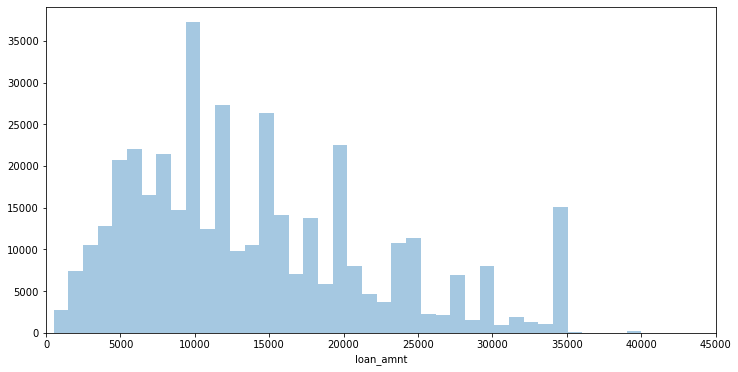

In [145]:
#creating a histogram of loan_amnt column .....kde=false means you want to hide it and only display the histogram.
#The bins parameter enables you to control the bins of the histogram (i.e., the number of bars).
# xlim is to set the x-limits of the current axes
plt.figure(figsize=(12,6))
sns.distplot(df['loan_amnt'],kde=False,bins=40)
plt.xlim(0,45000)

In [146]:
#explore correlation b\w continuous varaibles
#correlation b\w all continuous numeric variables using .corr()method
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


(10.0, 0.0)

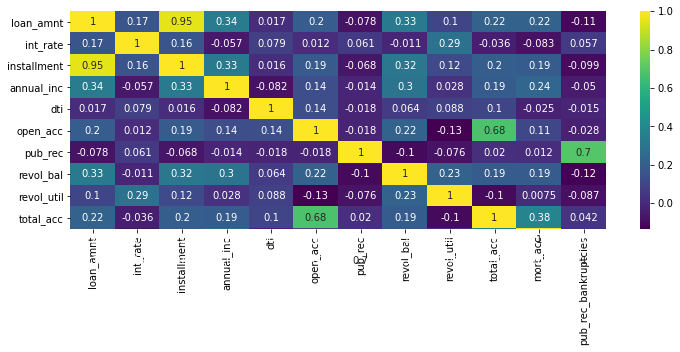

In [147]:
#visualizing .corr() using the heatmap .....annot: If True, write the data value in each cell. 
plt.figure(figsize=(12,4))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.ylim(10,0)

In [148]:
#finding perfect correlation with the "installment" feature. Explore this feature further. 
# Print out their descriptions and perform scatterplot between them.
feat_info('installment')
feat_info('loan_amnt')

The monthly payment owed by the borrower if the loan originates.
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

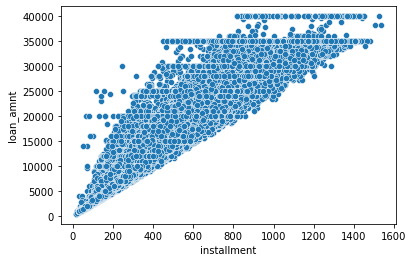

In [149]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

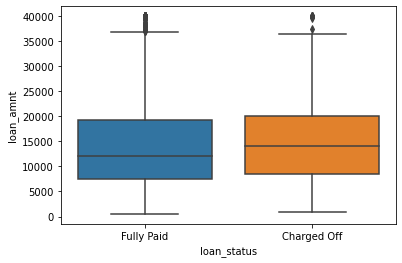

In [150]:
#Create a boxplot showing the relationship between the loan_status and the Loan Amount.
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [151]:
#the summary statistics for the loan amount, grouped by the loan_status.
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [152]:
#explore the Grade and SubGrade columns that LendingClub attributes to the loans. 
#What are the unique possible grades and subgrades.
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [153]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<AxesSubplot:xlabel='grade', ylabel='count'>

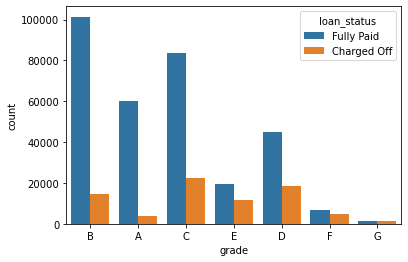

In [154]:
#count per grade set the hue to loan_status label
sns.countplot(x='grade',data=df,hue='loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

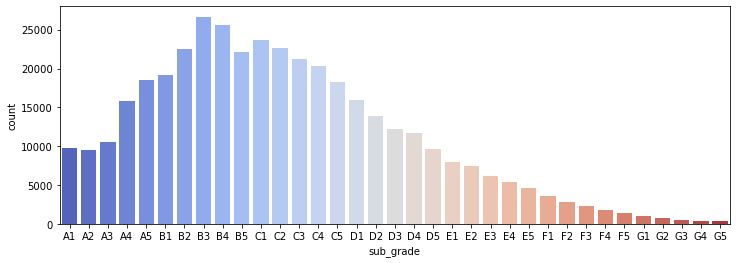

In [155]:
#count plot per subgrade. You may need to resize for this plot and reorder the x axis. Feel free to edit the color palette. 
#Explore both all loans made per subgrade as well being separated based on the loan_status
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=subgrade_order,palette='coolwarm')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

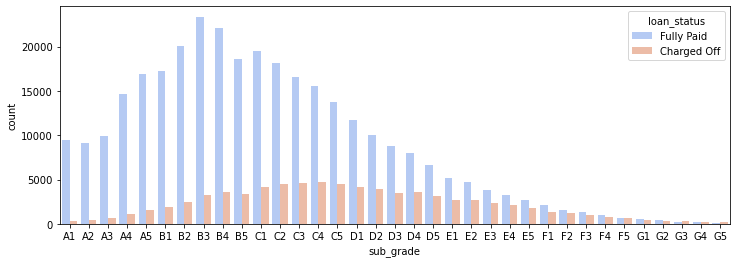

In [156]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=subgrade_order,palette='coolwarm',hue='loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

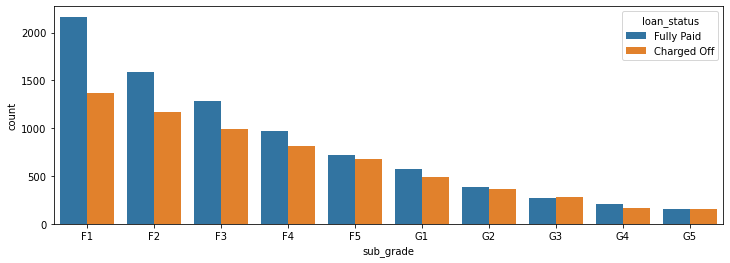

In [157]:
#It looks like F and G subgrades don't get paid back that often. 
#Isloate those and recreate the countplot just for those subgrades.
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]
plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order=subgrade_order,hue='loan_status')


In [158]:
#Create a new column called 'load_repaid' which will contain a 1 if the loan status was "Fully Paid" 
#and a 0 if it was "Charged Off"
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [159]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [160]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<AxesSubplot:>

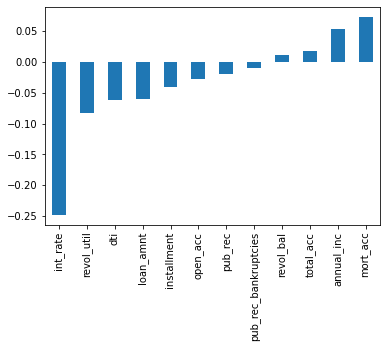

In [161]:
#Create a bar plot showing the correlation of the numeric features to the new loan_repaid column.
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar') #without loan_repaid


<AxesSubplot:>

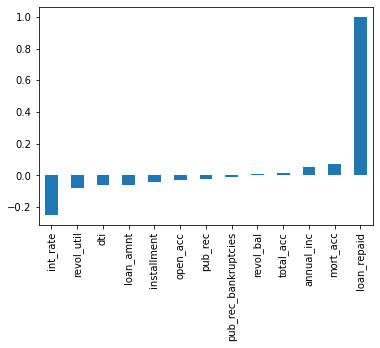

In [162]:
df.corr()['loan_repaid'].sort_values().plot(kind='bar')  #with loan_repaid

In [163]:
#DATA PREPROCESSING 

In [164]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


In [165]:
#explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, 
#to see if we should keep, discard, or fill in the missing data
len(df)

396030

In [166]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [167]:
#Convert this Series to be in term of percentage of the total DataFrame
100* df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [168]:
#Let's examine emp_title and emp_length to see whether it will be okay to drop them. 
#Print out their feature information using the feat_info() function
feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [169]:
df['emp_title'].nunique()

173105

In [170]:
df['emp_title'].value_counts()

Teacher                           4389
Manager                           4250
Registered Nurse                  1856
RN                                1846
Supervisor                        1830
                                  ... 
Residential Administration           1
Business Operations Specialist       1
Operator I                           1
Frontier Ag Inc.                     1
cash reciepts                        1
Name: emp_title, Length: 173105, dtype: int64

In [171]:
#remove emp_title
df =df.drop('emp_title',axis=1)

In [172]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [173]:
emp_length_order =['< 1 year',
    '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years',
 ]

<AxesSubplot:xlabel='emp_length', ylabel='count'>

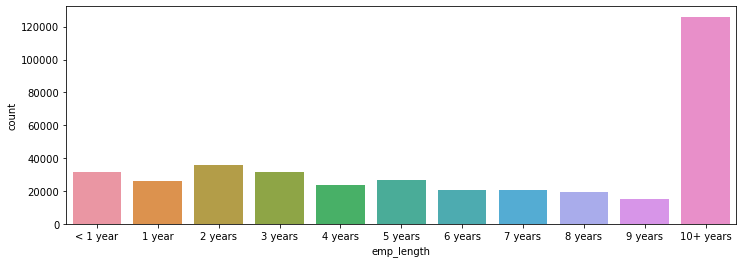

In [174]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

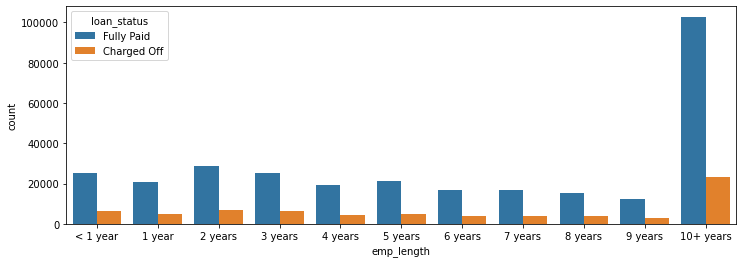

In [175]:
#Plot out the countplot with a hue separating Fully Paid vs Charged Off
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')

In [176]:
#This still doesn't really inform us if there is a strong relationship between employment length 
#and being charged off, what we want is the percentage of charge offs per category. 
#Essentially informing us what percent of people per employment category didn't pay back their loan
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']

In [177]:
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [178]:
emp_len =emp_co/emp_fp

In [179]:
emp_len


emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

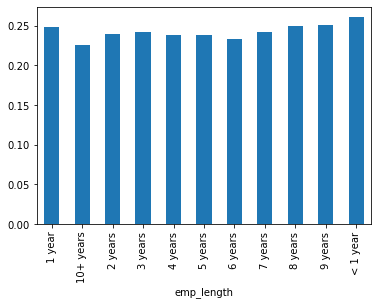

In [180]:
emp_len.plot(kind='bar')

In [181]:
#drop emp_length 
df =df.drop('emp_length',axis=1)

In [182]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [183]:
 #Review the title column vs the purpose column. Is this repeated information

In [184]:
df['purpose'].head(5)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
Name: purpose, dtype: object

In [185]:
df['title'].head(5)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
Name: title, dtype: object

In [186]:
#drop title column
df = df.drop('title',axis=1)

In [187]:
#Find out what the mort_acc feature represents
feat_info('mort_acc')

Number of mortgage accounts.


In [188]:
#create a value counts of mort_acc
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
31.0         2
26.0         2
32.0         2
28.0         1
34.0         1
30.0         1
Name: mort_acc, dtype: int64

In [215]:
#There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in,
#such as a linear model, we could just fill it in based on the mean of the other columns.
print('correlation with the marc_acc colimn')
df.corr()['mort_acc'].sort_values()

correlation with the marc_acc colimn


int_rate         -0.075478
purpose_other    -0.036133
purpose_other    -0.036133
purpose_moving   -0.031460
purpose_moving   -0.031460
                    ...   
revol_bal         0.198905
loan_amnt         0.223992
annual_inc        0.233001
total_acc         0.400440
mort_acc          1.000000
Name: mort_acc, Length: 93, dtype: float64

In [190]:
# Looks like the total_acc feature correlates with the mort_acc , this makes sense! 
#Let's try this fillna() approach. We will group the dataframe by the total_acc
#and calculate the mean value for the mort_acc per total_acc entry
print('mean of mort_acc column per total_acc')
df.groupby('total_acc').mean()['mort_acc']

mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [191]:
#Let's fill in the missing mort_acc values based on their total_acc value. 
#If the mort_acc is missing, then we will fill in that missing value with the mean value 
#corresponding to its total_acc value from the Series we created above. 
#This involves using an .apply() method with two columns
total_acc_avg =df.groupby('total_acc').mean()['mort_acc']

In [192]:
total_acc_avg[2.0]

0.0

In [193]:
 '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''

'\n   Accepts the total_acc and mort_acc values for the row.\n   Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value\n   for the corresponding total_acc value for that row.\n   \n   total_acc_avg here should be a Series or dictionary containing the mapping of the\n   groupby averages of mort_acc per total_acc values.\n   '

In [194]:
#np.isnan() function tests element-wise whether it is NaN or not and returns the result as a boolean array
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [195]:
#the apply() function to apply the lambda function to both rows and columns of a dataframe.
# A lambda function can take any number of arguments, but can only have one expression.
df['mort_acc'] =df.apply(lambda x:fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [196]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [197]:
#revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. 
#Go ahead and remove the rows that are missing those values in those columns with dropna()
df =df.dropna()

In [198]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [220]:
#We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.
df.select_dtypes(['object']).columns

Index(['issue_d', 'loan_status', 'earliest_cr_line'], dtype='object')

In [217]:
#Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [221]:
df= df.drop('issue_d',axis=1)

In [223]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [224]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [237]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

In [238]:
# train test split

In [241]:
from sklearn.model_selection import train_test_split

In [242]:
X =df.drop('loan_repaid',axis=1).values
y= df['loan_repaid'].values

In [243]:
print(len(df))

395219


In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [252]:
#Normalizing data
from sklearn.preprocessing import MinMaxScaler

In [253]:
scaler = MinMaxScaler()

In [257]:
X_train = scaler.fit_transform(X_train)

In [259]:
X_test = scaler.transform(X_test)

In [262]:
#creating model 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [266]:
model = Sequential()

# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')


In [269]:
model.fit(x=X_train,
          y=y_train,
          epochs=25,
          batch_size=256,
          validation_data=(X_test,y_test),
         )

Epoch 1/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2991 - val_loss: 0.2651
Epoch 2/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2657 - val_loss: 0.2638
Epoch 3/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2639 - val_loss: 0.2639
Epoch 4/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2624 - val_loss: 0.2631
Epoch 5/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2617 - val_loss: 0.2623
Epoch 6/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2611 - val_loss: 0.2627
Epoch 7/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2606 - val_loss: 0.2620
Epoch 8/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2604 - val_loss: 0.2619
Epoch 9/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2600 - val_loss: 0.2622
Epoch 10/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.259

In [270]:
#evalutaing the model performance
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

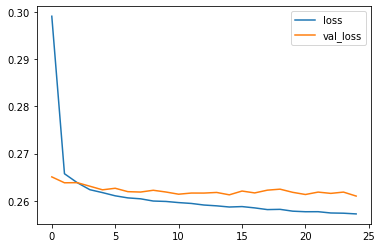

In [271]:
losses[['loss','val_loss']].plot()

In [272]:
#predictions from x_test and display classification report and confusion matrix
from sklearn.metrics import classification_report,confusion_matrix

In [274]:
prediction = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [275]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [276]:
print(confusion_matrix(y_test,prediction))

[[ 6806  8852]
 [   70 63316]]


In [277]:
#Given a customer below , would you offer this person loan

In [279]:
import random
random.seed(101) #stright point in generating random number

random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 93, dtype: float64

In [284]:
model.predict_classes(new_customer.values.reshape(1,93))

array([[1]])

In [285]:
df.iloc[random_ind]['loan_repaid']

1.0